In [1]:
import qckt
from QSystems import *
from qException import QCktException
import Registers as regs
import libgrover as grv
from Job import *

In [2]:
inreg = regs.QRegister(4)
work = regs.QRegister(4)
outreg = regs.QRegister(1)
rclreg = regs.CRegister(4)
nqbits,ncbits,allqreg,allcreg = regs.placement(outreg,work,inreg,rclreg)

### Sudoku validation circuit
sudo = qckt.QCkt(nqbits,name="Sudoku Validator")
rules = [[0,1],[1,3],[3,2],[2,0]] # rule is that the qubits in a tuple cannot be equal
for w,r in enumerate(rules):
	sudo.CX(inreg[r[0]],work[w])
	sudo.CX(inreg[r[1]],work[w])
sudo.CX(*work,outreg[0])
for w,r in enumerate(rules):
	sudo.CX(inreg[r[0]],work[w])
	sudo.CX(inreg[r[1]],work[w])
# sudo.draw()

### create a single gate representation of the sudoku circuit, and replace the Uf circuit using that one gate
sudo_op = sudo.to_opMatrix()
sudockt = qckt.QCkt(nqbits,ncbits,name="Sudoku Validator")
sudockt.CUSTOM("Sudo",sudo_op,allqreg)
# sudo.draw()

In [3]:
grv_ckt = grv.Grover(sudockt,inreg,outreg,nmarked=2).getckt()
grv_ckt.M(inreg,rclreg)
grv_ckt.draw()

Full Grover's Circuit
q000 -[H]----------#-[Sudo L]-[H]-[X]-[.]-[X]-[H]--#-[Sudo L]-[H]-[X]-[.]-[X]-[H]--#-------------[M]-
                   # |      |          |           # |      |          |           #              |  
q001 -[H]----------#-[Sudo  ]-[H]-[X]-[.]-[X]-[H]--#-[Sudo  ]-[H]-[X]-[.]-[X]-[H]--#---------[M]--|--
                   # |      |          |           # |      |          |           #          |   |  
q002 -[H]----------#-[Sudo  ]-[H]-[X]-[.]-[X]-[H]--#-[Sudo  ]-[H]-[X]-[.]-[X]-[H]--#-----[M]--|---|--
                   # |      |          |           # |      |          |           #      |   |   |  
q003 -[H]----------#-[Sudo  ]-[H]-[X]-[.]-[X]-[H]--#-[Sudo  ]-[H]-[X]-[.]-[X]-[H]--#-[M]--|---|---|--
                   # |      |          |           # |      |          |           #  |   |   |   |  
q004 --------------#-[Sudo  ]----------|-----------#-[Sudo  ]----------|-----------#--|---|---|---|--
                   # |      |          |           # |      

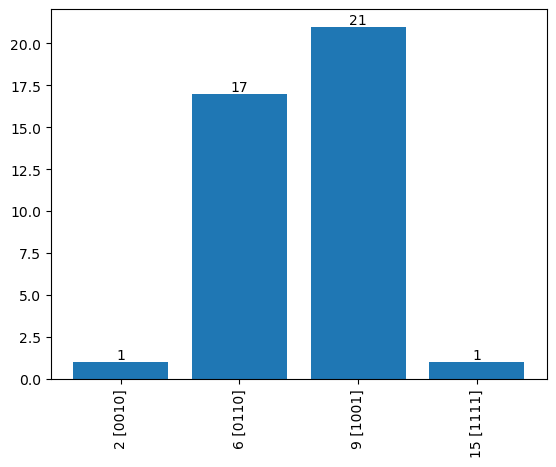

[0, 0, 1, 0, 0, 0, 17, 0, 0, 21, 0, 0, 0, 0, 0, 1]

In [4]:
job = Job(grv_ckt,shots=40)
q = Qeng()
q.runjob(job)
job.plot_counts()